In [1]:
# Dataset de consumo de drogas.
# A ideia é prever se uma pessoa já usou benzodiazepínicos, tendo em vista algumas informações pessoais,
# incluem o uso de outras drogas ou até mesmo alguns aditivos que essa gente possui.

# O problema original é dividido em sete classes,
# mas para simplificar vamos usar apenas dois que serão se nunca usados ou já usados uma vez,
# representados respectivamente por 'CL0' e 'CL1'.

# CL0 = "Nunca usado"

# CL1= "Usou"
# "Usado ao longo de uma década"
# "Usado na última década"
# "Usado no ano passado"
# Usado no último mês"
# "Usado na semana passada"
# "Usado no último dia "

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
drug_consumption = pd.read_csv('drug_consumption.csv')

In [4]:
drug_consumption

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Esctasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
drug_consumption.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Esctasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [6]:
X = drug_consumption[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

In [7]:
Y = drug_consumption[['Benzos']]

In [8]:
print(len(X), len(Y))

1885 1885


In [9]:
Y = Y.where(Y == 'CL0', 'CL1')
Y['Benzos'].value_counts()

CL0    1000
CL1     885
Name: Benzos, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [11]:
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)
predicted = clf.predict(x_test)

/Users/Dumont/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y = y_test.to_numpy()
y2 = y.flatten()

In [13]:
score = accuracy_score(y2, predicted)
f1 = f1_score(y2, predicted, average = 'binary', pos_label='CL0')
print(score, f1)

0.6710875331564987 0.6960784313725491


In [14]:
listOfAcc = [score, f1]
listOfMethods = ['score', 'f1']
def plotAverageAcc(listOfAcc, listOfMethods):

    listOfAcc = np.multiply(listOfAcc, 100)

    for l in range(len(listOfAcc)):
        ax = plt.axes()
        ax.bar(l, listOfAcc[l], align='center', width=0.4)

    plt.title("Plots")
    plt.xlabel("Métricas")
    plt.ylabel("Percent")
    plt.yticks(range(0, 101, 10))
    plt.xticks(range(len(listOfAcc)), listOfMethods)
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

/Users/Dumont/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


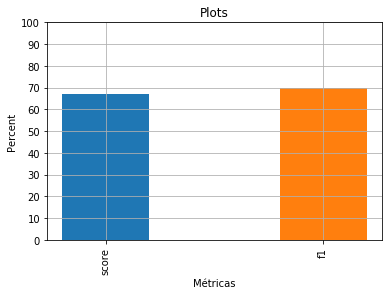

In [15]:
plotAverageAcc(listOfAcc, listOfMethods)